In [348]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [349]:
data = pd.read_excel('Data_Train.xlsx')
df =pd.DataFrame(data=data)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [351]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [352]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [353]:
df.dropna(inplace=True)

In [354]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [355]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [356]:
# Feature Engineering

In [357]:
df['journey_day'] = pd.to_datetime(df['Date_of_Journey'] , format = '%d/%m/%Y').dt.day
df['journey_month'] = pd.to_datetime(df['Date_of_Journey'] , format = '%d/%m/%Y').dt.month

In [358]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [359]:
df['arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [360]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,arrival_hour,arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,14,10


In [361]:
df.drop(['Arrival_Time','Date_of_Journey'] , inplace=True ,axis=1)

In [362]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,14,10


In [363]:
df['Dept_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dept_minute'] = pd.to_datetime(df.Dep_Time).dt.minute

In [364]:
#Duration 
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else :
            duration[i] = "0h " + duration[i]
duration

duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
df['duration_hour'] = duration_hours
df['duration_mins'] = duration_mins
df.drop(['Duration'] ,axis=1 ,inplace=True)

In [365]:
df

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,journey_day,journey_month,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,non-stop,No info,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,non-stop,No info,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,non-stop,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,non-stop,No info,12648,1,3,14,10,11,30,2,40


In [366]:
df.drop(['Dep_Time'] , axis =1 ,inplace=True)

In [367]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,14,10,11,30,2,40


In [368]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [369]:
Airline = df[['Airline']]
Curr_Airline_list = Airline['Airline']
New_Airline_list = []
for i in Curr_Airline_list :
    if i in ['Jet Airways',
'IndiGo',
'Air India',
'Multiple carriers',
'SpiceJet',
'Vistara',
'Air Asia',
'GoAir']:
        New_Airline_list.append(i)
    else:
        New_Airline_list.append("other")
Airline['Airline']= pd.DataFrame(New_Airline_list)
Airline.Airline.value_counts()

Airline
Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
other                  23
Name: count, dtype: int64

In [370]:
Airline = pd.get_dummies(Airline ,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [371]:
df.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [372]:
dataset = df[['Source']]
dataset = pd.get_dummies(dataset ,drop_first=True)
dataset.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [373]:
df.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [374]:
Dataset = df[['Destination']]
Curr_Dest_list = Dataset['Destination']
New_Dest_list = []

for i in Curr_Dest_list :
    if i in ['New Delhi'] :
        New_Dest_list.append('Delhi')
    else :
        New_Dest_list.append(i)

Dataset['Destination'] = pd.DataFrame(New_Dest_list)
Dataset = pd.get_dummies(Dataset,drop_first=True)
Dataset.head()
# New_Dest_list

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,False,True,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False


In [375]:
df.drop(['Route','Additional_Info'],inplace=True,axis= 1)

In [376]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,14,10,11,30,2,40


In [377]:
# Total_stops data label encoder
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [378]:
df.replace({"non-stop": 0 ,"1 stop":1 ,"2 stops":2,"3 stops" :3,"4 stops" :4},inplace=True)
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,14,10,11,30,2,40


In [379]:
train_data = pd.concat([df,Dataset,dataset,Airline],axis=1)
train_data.drop(['Airline','Destination' ,'Source'],axis=1 ,inplace=True)

In [380]:
train_data.head()

,Total_Stops,Price,journey_day,journey_month,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins,...,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,0,3897,24,3,1,10,22,20,2,50,...,False,False,False,False,True,False,False,False,False,False
1,2,7662,1,5,13,15,5,50,7,25,...,True,False,True,False,False,False,False,False,False,False
2,2,13882,9,6,4,25,9,25,19,0,...,False,False,False,False,False,True,False,False,False,False
3,1,6218,12,5,23,30,18,5,5,25,...,True,False,False,False,True,False,False,False,False,False
4,1,13302,1,3,21,35,16,50,4,45,...,False,False,False,False,True,False,False,False,False,False


In [381]:
train_data.shape

(10682, 26)

# feature selection 

In [382]:
train_data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'arrival_hour',
       'arrival_minute', 'Dept_hour', 'Dept_minute', 'duration_hour',
       'duration_mins', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_other'],
      dtype='object')

In [383]:
x = train_data.loc[:,['Total_Stops', 'journey_day', 'journey_month', 'arrival_hour',
       'arrival_minute', 'Dept_hour', 'Dept_minute', 'duration_hour',
       'duration_mins', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_other']]
y = train_data.iloc[:,1]

In [384]:
x.shape

(10682, 25)

In [385]:
y.shape

(10682,)

In [386]:
# important feature from ExtratreeRegressor >> tells importance of feature in predicting the target column  
from sklearn.ensemble import ExtraTreesRegressor
Selection = ExtraTreesRegressor()
Selection.fit(x,y)
print(Selection.feature_importances_)

[0.24193715 0.13735607 0.06830587 0.03608124 0.02611508 0.03028424
 0.02682698 0.1615249  0.02195389 0.00813361 0.02625587 0.0033445
 0.00229128 0.00090364 0.02102535 0.01225826 0.01549812 0.00676914
 0.00209725 0.01386432 0.09053812 0.01377302 0.00415649 0.00476259
 0.02394301]


In [387]:
plt.figure(figsize=(12,8))
feat_imp = pd.Series(Selection.feature_importances_ ,index = x.columns)
feat_imp

Total_Stops                  0.241937
journey_day                  0.137356
journey_month                0.068306
arrival_hour                 0.036081
arrival_minute               0.026115
Dept_hour                    0.030284
Dept_minute                  0.026827
duration_hour                0.161525
duration_mins                0.021954
Destination_Cochin           0.008134
Destination_Delhi            0.026256
Destination_Hyderabad        0.003345
Destination_Kolkata          0.002291
Source_Chennai               0.000904
Source_Delhi                 0.021025
Source_Kolkata               0.012258
Source_Mumbai                0.015498
Airline_Air India            0.006769
Airline_GoAir                0.002097
Airline_IndiGo               0.013864
Airline_Jet Airways          0.090538
Airline_Multiple carriers    0.013773
Airline_SpiceJet             0.004156
Airline_Vistara              0.004763
Airline_other                0.023943
dtype: float64

<Figure size 1200x800 with 0 Axes>

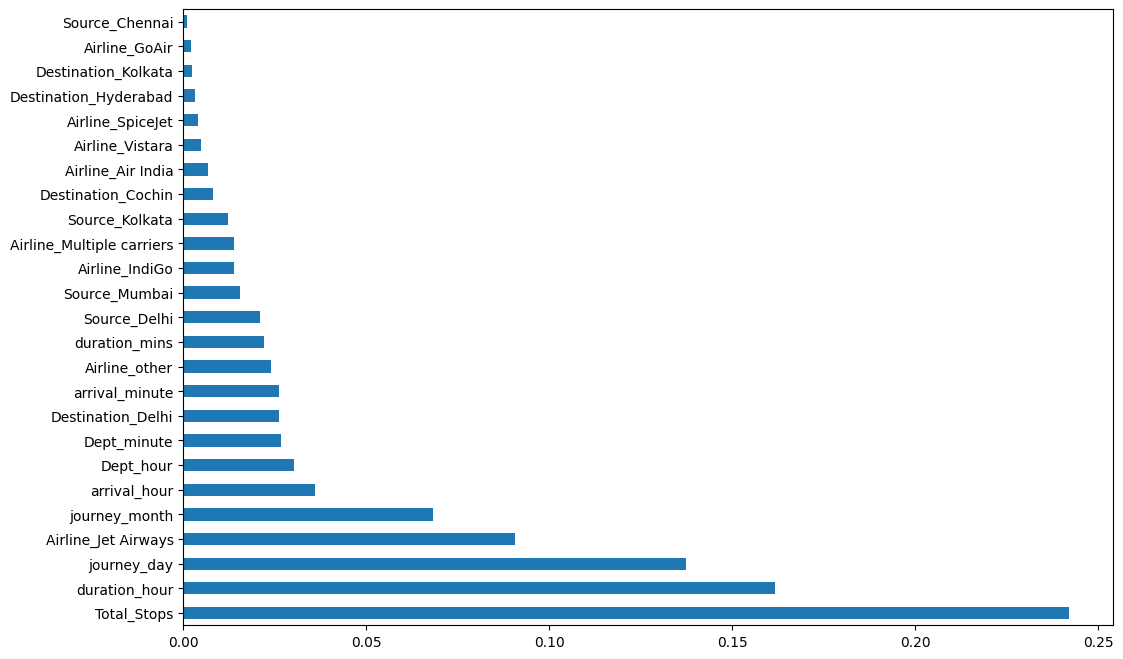

In [388]:
plt.figure(figsize=(12,8))
feat_imp = pd.Series(Selection.feature_importances_ ,index = x.columns)
feat_imp.nlargest(25).plot(kind='barh')
plt.show()

In [389]:
x=x.replace({False:0 , True:1})

In [390]:
x

,Total_Stops,journey_day,journey_month,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins,Destination_Cochin,...,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,0,24,3,1,10,22,20,2,50,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,5,13,15,5,50,7,25,0,...,1,0,1,0,0,0,0,0,0,0
2,2,9,6,4,25,9,25,19,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,12,5,23,30,18,5,5,25,0,...,1,0,0,0,1,0,0,0,0,0
4,1,1,3,21,35,16,50,4,45,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,22,25,19,55,2,30,0,...,1,0,1,0,0,0,0,0,0,0
10679,0,27,4,23,20,20,45,2,35,0,...,1,0,0,0,0,1,0,0,0,0
10680,0,27,4,11,20,8,20,3,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,1,3,14,10,11,30,2,40,1,...,0,0,1,0,0,0,0,0,0,0


In [391]:
x = x.astype({col: int for col in df.select_dtypes(include=bool).columns})


In [392]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Total_Stops                10682 non-null  int64
 1   journey_day                10682 non-null  int32
 2   journey_month              10682 non-null  int32
 3   arrival_hour               10682 non-null  int32
 4   arrival_minute             10682 non-null  int32
 5   Dept_hour                  10682 non-null  int32
 6   Dept_minute                10682 non-null  int32
 7   duration_hour              10682 non-null  int64
 8   duration_mins              10682 non-null  int64
 9   Destination_Cochin         10682 non-null  int64
 10  Destination_Delhi          10682 non-null  int64
 11  Destination_Hyderabad      10682 non-null  int64
 12  Destination_Kolkata        10682 non-null  int64
 13  Source_Chennai             10682 non-null  int64
 14  Source_Delhi               

In [393]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variables"] = x.columns
vif

,Variables
0,Total_Stops
1,journey_day
2,journey_month
3,arrival_hour
4,arrival_minute
5,Dept_hour
6,Dept_minute
7,duration_hour
8,duration_mins
9,Destination_Cochin


In [394]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Variables,VIF
0,Total_Stops,7.483614
1,journey_day,3.509757
2,journey_month,16.058719
3,arrival_hour,4.887929
4,arrival_minute,3.429245
5,Dept_hour,5.755551
6,Dept_minute,2.777481
7,duration_hour,6.085587
8,duration_mins,4.067779
9,Destination_Cochin,8.948777


In [395]:
x.drop("journey_month",axis=1,inplace=True)

In [396]:
vif = pd.DataFrame()
vif["Variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Variables,VIF
0,Total_Stops,7.479252
1,journey_day,3.509641
2,arrival_hour,4.856954
3,arrival_minute,3.428565
4,Dept_hour,5.652966
5,Dept_minute,2.768748
6,duration_hour,6.071356
7,duration_mins,3.997300
8,Destination_Cochin,8.864240
9,Destination_Delhi,4.464320


In [397]:
x.drop('Source_Delhi', inplace=True ,axis=1)

In [398]:
x

,Total_Stops,journey_day,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins,Destination_Cochin,Destination_Delhi,...,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,0,24,1,10,22,20,2,50,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,13,15,5,50,7,25,0,0,...,1,0,1,0,0,0,0,0,0,0
2,2,9,4,25,9,25,19,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,12,23,30,18,5,5,25,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,1,21,35,16,50,4,45,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,22,25,19,55,2,30,0,0,...,1,0,1,0,0,0,0,0,0,0
10679,0,27,23,20,20,45,2,35,0,1,...,1,0,0,0,0,1,0,0,0,0
10680,0,27,11,20,8,20,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10681,0,1,14,10,11,30,2,40,1,0,...,0,0,1,0,0,0,0,0,0,0


In [399]:
vif = pd.DataFrame()
vif["Variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Variables,VIF
0,Total_Stops,6.845624
1,journey_day,3.446078
2,arrival_hour,4.823525
3,arrival_minute,3.428339
4,Dept_hour,5.586473
5,Dept_minute,2.768708
6,duration_hour,6.069580
7,duration_mins,3.997251
8,Destination_Cochin,7.224706
9,Destination_Delhi,3.850780


In [400]:
vif[['Variables']]

,Variables
0,Total_Stops
1,journey_day
2,arrival_hour
3,arrival_minute
4,Dept_hour
5,Dept_minute
6,duration_hour
7,duration_mins
8,Destination_Cochin
9,Destination_Delhi


In [401]:
from sklearn.model_selection import train_test_split

In [402]:
X_train , X_test ,Y_train ,Y_test = train_test_split(x,y,test_size=0.30 ,random_state=1)

In [403]:
X_train


,Total_Stops,journey_day,arrival_hour,arrival_minute,Dept_hour,Dept_minute,duration_hour,duration_mins,Destination_Cochin,Destination_Delhi,...,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
4551,0,6,7,15,4,40,2,35,0,0,...,1,0,0,0,1,0,0,0,0,0
8555,0,9,4,15,1,30,2,45,0,1,...,0,0,0,0,1,0,0,0,0,0
6201,1,27,1,35,15,0,10,35,1,0,...,0,0,0,0,1,0,0,0,0,0
4235,1,9,16,10,7,10,9,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6170,2,24,4,25,5,30,22,55,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,9,12,0,21,10,14,50,0,0,...,1,0,0,0,0,1,0,0,0,0
7813,0,24,16,55,14,25,2,30,0,0,...,1,0,0,0,1,0,0,0,0,0
905,1,18,16,10,8,35,7,35,1,0,...,0,0,0,0,1,0,0,0,0,0
5192,1,12,9,45,9,35,24,10,0,0,...,1,0,0,0,0,1,0,0,0,0


In [404]:
Y_train

4551     4804
8555     6860
6201     8075
4235     6513
6170    13014
        ...  
2895    14571
7813     4804
905      6442
5192    14151
235      4409
Name: Price, Length: 7477, dtype: int64

In [405]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model

RandomForestRegressor()

In [406]:
# Model performance 
Y_pred = model.predict(X_test)

In [407]:
Y_pred

array([ 5696.0505    , 11115.05138889, 11373.09716667, ...,
        3973.72142857, 10948.81854762,  9720.3375    ], shape=(3205,))

In [408]:
#  Performance metric 
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score ,root_mean_squared_error

In [409]:
print(mean_absolute_error(Y_test , Y_pred))
print(mean_squared_error(Y_test , Y_pred))
print(r2_score(Y_test , Y_pred))
print(root_mean_squared_error(Y_test , Y_pred))

1632.2148091373433
6375937.999199959
0.6776085185628418
2525.0619792789166


In [410]:
score =(root_mean_squared_error(Y_test , Y_pred))

In [411]:
#  adjusted r_square score
1-((1-score)*len(Y_test)-1) / ((len(Y_test))-X_test.shape[1]-1)

2544.105829484102

In [412]:
import pickle as pk
file = open("Flight_fare.pkl",'wb')
pk.dump(model , file)

In [413]:
path = 'Flight_fare.pkl'
rmodel = open(path,'rb')
rf_model = pk.load(rmodel)
rf_model

RandomForestRegressor()

In [414]:
unseen_dataset = pd.read_excel('Test_set.xlsx')
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [415]:
X_train.columns

Index(['Total_Stops', 'journey_day', 'arrival_hour', 'arrival_minute',
       'Dept_hour', 'Dept_minute', 'duration_hour', 'duration_mins',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_other'],
      dtype='object')

In [416]:
unseen_dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [417]:
# Perform feature engineering on object dt variables
# Feature Engineering on: 'Date_of_Journey'
unseen_dataset["journey_day"] = pd.to_datetime(unseen_dataset['Date_of_Journey'], format="%d/%m/%Y").dt.day
unseen_dataset["journey_month"] = pd.to_datetime(unseen_dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
unseen_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Feature Engineering on: 'Dep_Time'
unseen_dataset["Dept_hour"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.hour
unseen_dataset["Dept_minute"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.minute
unseen_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Arrival_Time'
unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.hour
unseen_dataset["arrival_minute"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.minute
unseen_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Duration'
duration = list(unseen_dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
unseen_dataset["duration_hour"] = duration_hours
unseen_dataset["duration_mins"] = duration_mins
unseen_dataset.drop(["Duration"], axis = 1, inplace = True)


# Perform feature engineering on Categorical dt variables
# Feature Engineering on: 'Airline'
# Airline = unseen_dataset[["Airline"]]
# New_Airline_List = []
# Current_Airline_List = Airline['Airline']
# for carrier in Current_Airline_List:
#   if carrier in ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
#        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
#     New_Airline_List.append(carrier)
#   else:
#     New_Airline_List.append('Other')
# Airline['Airline'] = pd.DataFrame(New_Airline_List)
# Airline = pd.get_dummies(Airline, drop_first= True)

# 
Airline = unseen_dataset[['Airline']]
Curr_Airline_list = Airline['Airline']
New_Airline_list = []
for i in Curr_Airline_list :
    if i in ['Jet Airways',
'IndiGo',
'Air India',
'Multiple carriers',
'SpiceJet',
'Vistara',
'Air Asia',
'GoAir']:
        New_Airline_list.append(i)
    else:
        New_Airline_list.append("other")
Airline['Airline']= pd.DataFrame(New_Airline_list)
Airline = pd.get_dummies(Airline, drop_first= True)

# Feature Engineering on: 'Source'
Source = unseen_dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

# Feature Engineering on: 'Destination'
Destination = unseen_dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []
for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)
Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination['Destination'].value_counts()
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

# Feature Engineering on: 'Route', 'Additional_Info
unseen_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Feature Engineering on: 'Total_Stops'
unseen_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> train_data + Airline + Source + Destination
data_test = pd.concat([unseen_dataset, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# See how the test dataset looks
data_test.head()


,Total_Stops,journey_day,journey_month,Dept_hour,Dept_minute,arrival_hour,arrival_minute,duration_hour,duration_mins,Airline_Air India,...,Airline_Vistara,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,False,...,False,False,False,True,False,False,True,False,False,False
1,1,12,5,6,20,10,20,4,0,False,...,False,False,False,False,True,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,...,False,False,False,True,False,False,True,False,False,False
3,1,21,5,8,0,21,0,13,0,False,...,False,False,False,True,False,False,True,False,False,False
4,0,24,6,23,55,2,45,2,50,False,...,False,False,False,False,False,False,False,True,False,False


In [418]:
# Drop 'Source_Delhi'
X_unseen = data_test.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'Dept_hour',
       'Dept_minute', 'arrival_hour', 'arrival_minute', 'duration_hour',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_other', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y_unseen = data_test.iloc[:, 1]

In [419]:
X_train.columns

Index(['Total_Stops', 'journey_day', 'arrival_hour', 'arrival_minute',
       'Dept_hour', 'Dept_minute', 'duration_hour', 'duration_mins',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_other'],
      dtype='object')

In [420]:
X_unseen = X_unseen[X_train.columns] 
# rf_model.predict(X_unseen)

In [429]:
y_predicted =rf_model.predict(X_unseen)
result = pd.DataFrame(y_predicted,columns=["predicted_price"])
result

,predicted_price
0,12781.794333
1,4340.600000
2,14409.884000
3,9988.351333
4,4395.962556
...,...
2666,9744.990000
2667,5143.033333
2668,12251.117000
2669,12083.831000


In [434]:
original_dataset= pd.read_excel('Test_set.xlsx')
dfx = pd.concat([original_dataset,result],axis=1)
original2= pd.read_excel('Sample_submission.xlsx')
dfy = pd.concat([dfx,original2 ],axis=1)
dfy.to_excel('result.xlsx')
dfy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,predicted_price,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,12781.794333,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4340.600000,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,14409.884000,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,9988.351333,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4395.962556,16934
